# P04 Flow Control

**for-if-else**的語法概念本身並不難，一個是重複執行的結構，一個是條件判斷式。學習重點應在於，怎麼活用他們來完成一些任務。

<div style="border:2px solid gray; padding:5px; background-color:#F8F8F8">

- for-loo-: Interating and Traversing
  - 基本用法：用於計數和列出特定資料集。
  - 列舉（Iterating）：遍歷列表或其他集合型態的所有元素。
  - 走訪（Traversing）：用於走訪複雜的資料結構，如多維陣列或樹狀結構。

- break 和 continue：控制迴圈
  - `continue`：在特定條件下跳過迴圈內剩餘的指令。
  - `break`：在特定條件下終止整個迴圈。
  - 在網路爬蟲中常用，以處理不確定的爬取範圍和資料可用性。

- range() 函式
  - 用於生成數字序列。
  - 可接受一個、兩個或三個參數，以控制數字序列的起始、結束和間隔。
  - 可用於逆序列舉和資料型態轉換。

- Nested for-loop
  - 基本語法：一個迴圈內包含另一個或多個迴圈。
  - 應用場景：二維數組遍歷、矩陣運算等。
  - 計算量較大，需注意效能問題。
  - 實作：九九乘法表實作

- if-elif-else
  - 應用場景：多條件判斷、多分支判斷、多路徑判斷
  - 實作：成績等第制

</div>

## For: Traverse and Iterate

`for` 是一個極為強大的程式指令，不僅可以用於計數，還能用於列出所有特定資料集（如youbike站台）的相關資訊。其基本作用是在指定的範疇或資料結構中重複執行一段程式碼，因此它也常被稱作**for-each**迴圈。

- **列舉（Iterating）：** `for` 迴圈可以遍歷（iterate）一個列表（list）或其他集合型態的所有元素，並對每一個元素執行特定操作。例如，你可以用它來計算數字的總和或平均值。
  
- **走訪（Traversing）：** 除了基本的列舉外，`for` 迴圈還可以用於走訪複雜的資料結構，例如多維陣列或樹狀結構。

簡而言之，這裡的 `for` 迴圈是一個多用途的工具，能有效地走訪或列舉列表中的每一個項目，達到如計數、排序或搜索等多種功能。

In [3]:
# Counting
fruit_count = {}
fruit_list = ['apple', 'apple', 'banana', 'apple', 'banana', 'grape', 'banana', 'apple']

for fruit in fruit_list:
   if fruit not in fruit_count:
       fruit_count[fruit] = 1
   else:
       fruit_count[fruit] = fruit_count[fruit] + 1

print(fruit_count)


{'apple': 4, 'banana': 3, 'grape': 1}


用以僅僅是把所有的內容給print出來。

In [6]:
for fruit in ['apple', 'banana', 'cherry', 'Durian']:
    print("I love", fruit)

I love apple
I love banana
I love cherry
I love Durian


In [16]:
table = {'Sjoerd': 41273, 'Jack': 409, 'Dcab': 7678}
for name, id in table.items():
    print(f'{name:10} ==> {id:10d}')

Sjoerd     ==>      41273
Jack       ==>        409
Dcab       ==>       7678


## `break` & `continue`: 中止迴圈

在for-loop執行過程中，有時候會希望在某些條件成立時，就直接終止並跳出整個for-loop，或者，迴圈內以下的內容就不要執行，直接執行下一個iteration。包含以下兩種指令：
- `continue`: 當條件成立，下方的迴圈內容就不再執行，直接進入下一個iteration。
- `break`：當條件成立，就終止整個回圈，跳出回圈的執行。

在寫爬蟲的時候經常會用到`break`和`continue`的指令，原因是常常不知道究竟要爬多少頁才要停下來，或者，會不會爬到一個已經被移除的貼文（例如PTT）。
- `break`的應用：在撰寫爬蟲的時候，偶而會遇到不知道要爬到什麼時候，或者總資料筆數有多少（例如Twitter、DCard等等有API的服務）。此時通常會為for-loop設定一個過大停止值，例如撈個1000,000頁。此時，for-loop會一頁一頁往下撈，但總會遇到for-loop撈不到下一頁的情形，那就看看產生的錯誤是什麼，然後用`if`來判斷，如果出現該錯誤的時候，我就`break`出整個for-loop迴圈，就會停止該for-loop而不會真的撈到100,000頁。
- `continue`的應用：在撰寫爬蟲的時候，通常我們會在for-loop中邊爬邊剖析資料，也就是把一個頁面爬下來之後，就立刻剖析他，偵測看看標題、作者是什麼，然後才進入下一迴圈、爬下一個頁面。但是，偶而就會遇到像是PTT的貼文一樣，明明還有該網址，但是內容卻被移除了。既然內容被移除了，那就偵測不到標題和作者了。這時候，程式的寫法往往會是，我偵測看看是不是貼文是不是被移除了，如果被移除了，雖然我把該頁抓下來了，那我就用`continue`跳過剖析頁面資料的過程，直接進入下一圈迴圈（沒跳過反而會出現Error）。但也許各位會問，那這樣不就和if-else很像？如果偵測到什麼，就做什麼事。但利用`continue`可以讓程式碼比較乾淨，不用把之後要剖析資料的程式碼，放在if-else的判斷式裡面。

`continue`的邏輯示意圖如下，當滿足某個條件而執行`continue`時，便不會執行在for-loop在`continue`後面的指令，而會直接進入下一圈for-loop（Illustration from https://www.geeksforgeeks.org/break-continue-and-pass-in-python/）。
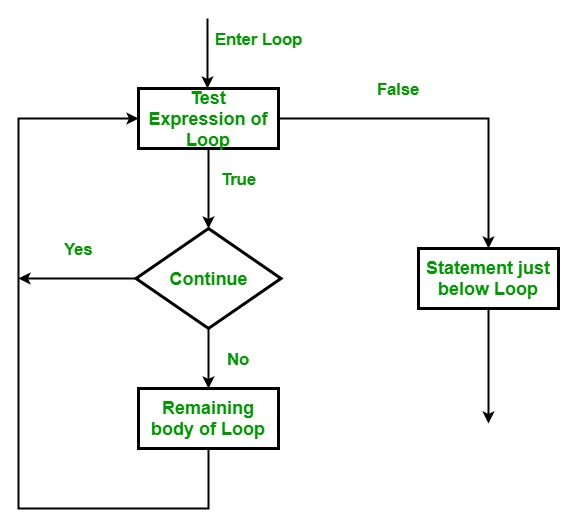

In [8]:
grades = {'albert': 33, 'bob': 44, 'carlos': 100, 'david': 90, 'ellen': 100}
for g in grades:
    if grades[g] >=100:
        print(g)

carlos
ellen


在下面的例子中，若讀到小於100的數值，就直接進入下一個iteration，就不會執行到`print(g)`

In [7]:
grades = {'albert': 33, 'bob': 44, 'carlos': 100, 'david': 90, 'ellen': 100}
for g in grades:
    if grades[g] < 100:
        continue
    print(g)

carlos
ellen


在下面的例子中，若讀到大於等於100的數值，break會使得整個for-loop終止。通常用於找到一序列的資料中，有沒有包含某個合乎條件的情形，有的話便跳出。

In [10]:
grades = {'albert': 33, 'bob': 44, 'carlos': 100, 'david': 90, 'ellen': 100}
for g in grades:
    if grades[g] >= 100:
        print(g)
        break

carlos


## range()函式

`range()` 是一個內建函數，主要用於生成一個數字序列。這個函數可以接受一個、兩個或三個參數，各自有不同的用途。for-loop為了用index來列舉所有List中的項目，經常搭配`range()`使用。基本用法如下

- **一個參數**：`range(n)` 會生成從 `0` 到 `n-1` 的整數序列。
- **兩個參數**：`range(start, stop)` 會生成從 `start` 到 `stop-1` 的整數序列。
- **三個參數**：`range(start, stop, step)` 會生成從 `start` 到 `stop-1` 的整數序列，其中每個數字的間隔是 `step`。
- **逆序列舉**：你可以使用負數作為 `step` 參數，來生成一個逆序的數字序列。如`for i in range(5, 0, -1)`會輸出`5 4 3 2 1`。
- **資料型態轉換**：雖然 `range()` 主要用於生成整數序列，但你也可以通過轉換來創造其他類型的序列，例如將其轉換為一個列表。`my_list = list(range(5))`

`range()`函數對於`for`迴圈來說是極其有用的，因為他可以讓`for`迴圈遍歷過一個範圍內的所有數字，因而可以用來遍歷一個列表（List）或其他資料結構。

In [11]:
for x in range(6):
  print(x)

0
1
2
3
4
5


In [12]:
for x in range(2, 6):
  print(x)

2
3
4
5


In [1]:
for x in range(2, 30, 3):
  print(x)

2
5
8
11
14
17
20
23
26
29


In [2]:
alist = ['apple', 'banana', 'cherry']
for i in range(len(alist)):
    print(i, alist[i])

0 apple
1 banana
2 cherry


## Nested for-loop

在程式設計中，嵌套迴圈（nested loops）是一個迴圈內包含另一個或多個迴圈的概念。在這節教學中，我們將透過實例來介紹如何使用 Python 中的嵌套 `for-loop`。

基本語法
```python
for outer_var in outer_sequence:
    # outer loop body
    for inner_var in inner_sequence:
        # inner loop body
    # end of inner loop
# end of outer loop
```

應用情景
- 二維數組或列表的遍歷。
- 矩陣運算。
- 圖形和遊戲開發中的格點系統。

補充說明
- 嵌套迴圈會大幅度增加程式的計算量，因此，在使用時應該特別注意效能問題。適當地使用`break`或`continue`能夠提高嵌套迴圈的效能。


---


### Print 9 x 9 table

九九乘法表是基礎數學中一個重要的工具，用於練習和記憶基本的乘法運算。這個題目要求使用Python程式碼來生成九九乘法表。

程式碼解析
1. 使用兩個嵌套的 `for` 迴圈，外層迴圈變數 `a` 從1到9，內層迴圈變數 `b` 也從1到9。
2. 在內層迴圈中，使用 `print` 函數來輸出每一個乘法運算（`a*b`）的結果。
3. 使用字串格式化`f"{a}*{b} ={a*b:2d}"`來確保輸出的格式是整齊的。
4. 使用 `end="  "` 來確保每一行的所有乘法運算結果都在同一行輸出。
5. 在內層迴圈結束後，使用 `print()` 函數來換行。

題目目的
1. 練習使用嵌套迴圈。
2. 練習使用字串格式化來控制輸出格式。
3. 理解如何使用程式碼來生成九九乘法表。

提示
- 注意如何使用字串格式化來控制輸出的空格和對齊。
- 注意 `end="  "` 的作用，它確保了同一行的輸出不會換行。

In [1]:
for a in range(1, 10):
    for b in range(1, 10):
        print(f"{a}*{b} ={a*b:2d}", end="  ")
    print()

1*1 = 1  1*2 = 2  1*3 = 3  1*4 = 4  1*5 = 5  1*6 = 6  1*7 = 7  1*8 = 8  1*9 = 9  
2*1 = 2  2*2 = 4  2*3 = 6  2*4 = 8  2*5 =10  2*6 =12  2*7 =14  2*8 =16  2*9 =18  
3*1 = 3  3*2 = 6  3*3 = 9  3*4 =12  3*5 =15  3*6 =18  3*7 =21  3*8 =24  3*9 =27  
4*1 = 4  4*2 = 8  4*3 =12  4*4 =16  4*5 =20  4*6 =24  4*7 =28  4*8 =32  4*9 =36  
5*1 = 5  5*2 =10  5*3 =15  5*4 =20  5*5 =25  5*6 =30  5*7 =35  5*8 =40  5*9 =45  
6*1 = 6  6*2 =12  6*3 =18  6*4 =24  6*5 =30  6*6 =36  6*7 =42  6*8 =48  6*9 =54  
7*1 = 7  7*2 =14  7*3 =21  7*4 =28  7*5 =35  7*6 =42  7*7 =49  7*8 =56  7*9 =63  
8*1 = 8  8*2 =16  8*3 =24  8*4 =32  8*5 =40  8*6 =48  8*7 =56  8*8 =64  8*9 =72  
9*1 = 9  9*2 =18  9*3 =27  9*4 =36  9*5 =45  9*6 =54  9*7 =63  9*8 =72  9*9 =81  


## if-elif-else 條件語句教學

在程式設計中，`if-elif-else` 是用來執行基於一個或多個條件的分支運算。在這節教學中，我們會透過實例來介紹如何在 Python 中使用 `if-elif-else` 條件語句。

基本語法

```python
if condition1:
    # Code block for condition1
elif condition2:
    # Code block for condition2
else:
    # Code block if none of the conditions are met
```

範例：學生成績評定。以下是一個簡單的 `if-elif-else` 程式範例，用來評定學生成績。

```python
grade = 85

if grade >= 90:
    print("優秀")
elif grade >= 80:
    print("良好")
elif grade >= 70:
    print("中等")
elif grade >= 60:
    print("及格")
else:
    print("不及格")
```

應用場景
- 數值比較（例如，找出最大值或最小值）。
- 狀態檢查（例如，檢查檔案是否存在）。
- 資料過濾和篩選。

---

### Example: Assign 0~100 into A, B, C, ..Class

在這個Python練習題中，我們有一個名為`grades`的列表，其中包含多個學生成績（範圍為0到100分）。我們還有一個名為`grade_dict`的字典，用於存儲各等級（A、B、C、F）的頻率。我們的任務是使用for迴圈遍歷`grades`列表，並根據每個學生成績更新`grade_dict`字典。
- 練習Python的基本數據結構（列表和字典）
- 熟悉條件語句（`if-elif-else`）
- 練習迴圈結構

提示
1. **條件判斷**: 注意條件語句中的數字範圍。例如，等級"A"對應的分數範圍是80至100。
2. **字典更新**: 在適當的條件塊內，使用`+= 1`來更新`grade_dict`中的相應頻率。
3. **確保範圍**: 由於學生成績的範圍是0到100，所以在條件語句中確保所有可能的分數都被考慮到。
4. **結果輸出**: 最後的`print(grade_dict)`將顯示各等級的頻率。您可以進一步優化輸出格式，以便更易於閱讀。

In [3]:
# Initializing level frequency
grades = [17, 65, 5, 74, 93, 1, 94, 16, 80, 95, 32, 78, 17, 70, 22, 43, 95, 67, 3, 30, 40, 51, 96, 17, 13, 21, 4, 47, 19, 44, 59, 6, 0, 83, 40, 89, 39, 57, 99, 35, 81, 31, 89, 63, 80, 85, 36, 60, 17, 68, 62, 36, 3, 28, 8, 38, 83, 73, 67, 2]
grade_dict = {'F':0, "C":0, "B":0, "A":0}

# Counting level frequency
for g in grades:
    if 100 >= g >= 80:
        grade_dict["A"] += 1
    elif 79 >= g >= 72:
        grade_dict["B"] += 1
    elif 71 >= g >= 60:
        grade_dict["C"] += 1
    else:
        grade_dict["F"] += 1
print(grade_dict)

{'F': 35, 'C': 8, 'B': 3, 'A': 14}
